In [18]:
# this allows plots to appear directly in the notebook
%matplotlib inline

# Import the libraries required
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as linear
import numpy as np

In [145]:
# t1 = pd.read_csv("olimpics.csv")
t1 = pd.read_csv("olimpics.csv", index_col = 'year')
t1

,Unnamed: 0,city,country,events,men,participants,sport,women
year,,,,,,,,
2012,0,London,Great Britain,302,5864,10519,32,4655
2008,1,Beijing,China,303,6290,10901,34,4611
2004,2,Athina,Greece,301,6257,10561,34,4304
2000,3,Sydney,Australia,300,6579,10648,34,4068
1996,4,Atlanta,United States,271,6819,10342,31,3520
1992,5,Barcelona,Spain,257,6659,9386,29,2721
1988,6,Seoul,South Korea,237,6249,8453,27,2202
1984,7,Los Angeles,United States,221,5224,6799,26,1567
1980,8,Moskva,Soviet Union,203,4135,5259,23,1123


In [147]:
t1_new = t1.drop(['Unnamed: 0'], axis=1).sort()
t1_new

S:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,city,country,events,men,participants,sport,women
year,,,,,,,
1896,Athina,Greece,43,176,176,9,0
1900,Paris,France,95,1201,1224,20,23
1904,St. Louis,United States,95,644,650,18,6
1906,Athina,Greece,74,835,841,13,6
1908,London,Great Britain,109,1980,2024,24,44
1912,Stockholm,Sweden,107,2356,2424,17,53
1920,Antwerpen,Belgium,160,2599,2677,25,78
1924,Paris,France,130,3100,3256,20,156
1928,Amsterdam,Netherlands,120,2936,3248,17,312


In [148]:
t1_new.dtypes

city            object
country         object
events           int64
men              int64
participants     int64
sport            int64
women            int64
dtype: object

In [149]:
t1_new.describe(include = 'all')

,city,country,events,men,participants,sport,women
count,28,28,28.000000,28.000000,28.000000,28.000000,28.000000
unique,22,19,NaN,NaN,NaN,NaN,NaN
top,London,United States,NaN,NaN,NaN,NaN,NaN
freq,3,4,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,175.642857,3991.428571,5269.392857,22.821429,1276.571429
std,NaN,NaN,74.224491,2013.745293,3384.534241,6.336570,1561.176656
min,NaN,NaN,43.000000,176.000000,176.000000,9.000000,0.000000
25%,NaN,NaN,124.500000,2538.250000,2613.750000,18.750000,136.500000
50%,NaN,NaN,155.000000,4273.000000,5034.500000,22.000000,567.000000
75%,NaN,NaN,225.000000,5911.000000,7448.000000,26.250000,1725.750000


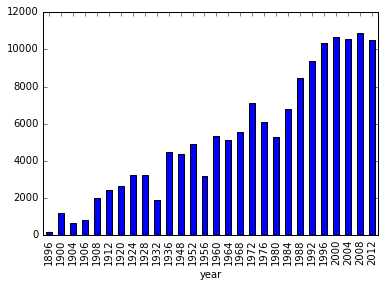

In [150]:
t1_new.participants.plot.bar()

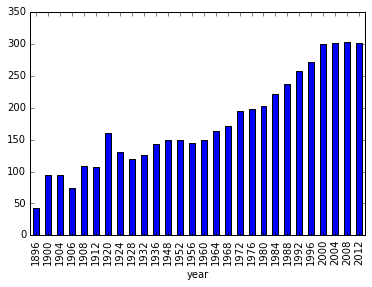

In [151]:
t1_new.events.plot.bar()

In [152]:
t1_new.corr()

,events,men,participants,sport,women
events,1.000000,0.910439,0.975529,0.936163,0.940395
men,0.910439,1.000000,0.959033,0.814115,0.789000
participants,0.975529,0.959033,1.000000,0.889958,0.930730
sport,0.936163,0.814115,0.889958,1.000000,0.879187
women,0.940395,0.789000,0.930730,0.879187,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001239E390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000013943CF8>]], dtype=object)

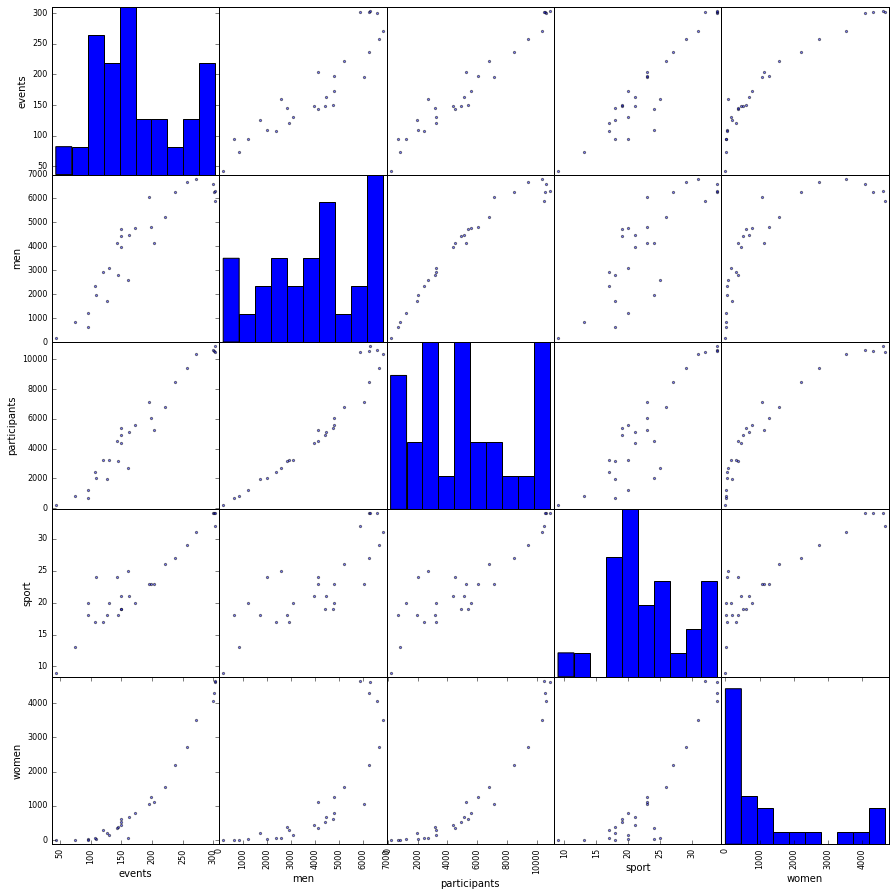

In [153]:
pd.scatter_matrix(t1_new, figsize=(15,15))

In [154]:
# no_of_events = t1_new.events
no_of_events = t1_new.loc[:, ["events"]]

In [155]:
no_of_participants = t1_new.participants

In [156]:
regressor = linear.RANSACRegressor()

In [157]:
regressor.fit(no_of_events, no_of_participants)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [158]:
predict_participants = regressor.predict(no_of_events)

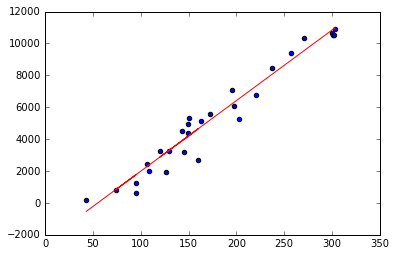

In [159]:
plt.scatter(t1_new.events, t1_new.participants)
plt.plot(t1_new.events, predict_participants, color='red')

In [160]:
regressor.predict([[306]]) # no of events in Brazil

array([ 11111.39773184])

In [161]:
no_of_women = t1_new.women

In [164]:
women_model = linear.RANSACRegressor()

In [165]:
women_model.fit(no_of_events, no_of_women)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [166]:
predict_women = regressor.predict(no_of_events)

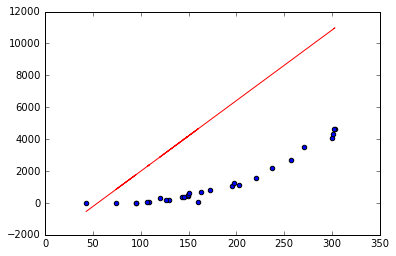

In [167]:
plt.scatter(t1_new.events, t1_new.women)
plt.plot(t1_new.events, predict_women, color='red')

In [171]:
t2 = pd.read_csv('Olympics18962012.csv')
t2

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold


In [172]:
t2.describe(include = 'all')

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
count,31150,31150.000000,31150,31150,31150,31150,31150,31150,31150,31150
unique,22,NaN,42,56,22776,145,2,596,3,3
top,London,NaN,Aquatics,Athletics,"PHELPS, Michael",USA,Men,football,M,Gold
freq,3552,NaN,4171,3623,22,4578,22740,1495,21055,10482
mean,NaN,1970.462793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,33.153877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1948.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
# numbers of medals per country
t2.NOC.value_counts()

USA    4578
URS    2049
GBR    1720
FRA    1391
GER    1304
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     804
JPN     789
RUS     775
CAN     647
ROU     640
NOR     555
KOR     527
POL     511
DEN     507
FRG     490
FIN     456
ESP     442
YUG     435
BRA     431
BEL     411
CUB     410
SUI     380
BUL     333
TCH     329
       ... 
AFG       2
ZAM       2
LUX       2
ECU       2
KUW       2
SUR       2
MRI       1
BOT       1
BDI       1
TOG       1
DJI       1
SUD       1
AHO       1
GUA       1
BER       1
GUY       1
GAB       1
IRQ       1
ERI       1
GRN       1
CYP       1
MKD       1
CIV       1
UAE       1
NIG       1
TGA       1
SEN       1
ISV       1
BAR       1
BRN       1
Name: NOC, dtype: int64

In [175]:
USA = t2[t2.NOC == "USA"]
USA

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
19,Athens,1896,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500m,M,Silver
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
22,Athens,1896,Athletics,Athletics,"JAMISON, Herbert",USA,Men,400m,M,Silver
27,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,discus throw,M,Gold
29,Athens,1896,Athletics,Athletics,"CLARK, Ellery",USA,Men,high jump,M,Gold
30,Athens,1896,Athletics,Athletics,"CONNOLLY, James",USA,Men,high jump,M,Silver
31,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,high jump,M,Silver
